# 機械学習　効果測定　分類(SVM)
#### ●選択データ：breast_cancer.csv
#### ●分類で選択したモデル：SVM
#### ●SVMを選択した理由：  
　　散布図にて正解データ(target)に対するデータを線形分類するモデルが良いと判断したため。マージン最大化の計算をするSVMを選択した

#### ●以下、【考察】にて検討した内容を記載する

### ◆CSVファイルの読み込みと表示

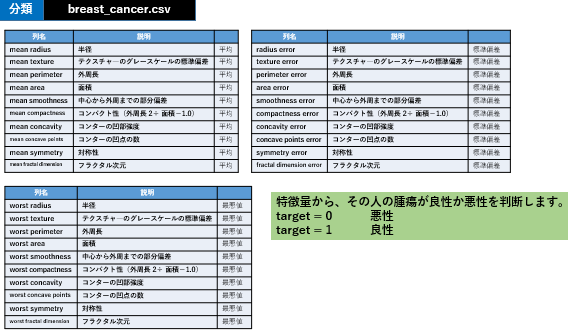

In [1]:
# pandasをインポートして別名をpdとする
# 実装
import pandas as pd

# アップロードしたCSVファイルを読み込んでデータフレームを生成する
# 行数・列数を確認する
df = pd.read_csv('breast_cancer.csv', encoding = 'UTF-8')
print(df.shape)

(569, 31)


In [2]:
# データフレームの先頭5行を表示する
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### ◆ダミー変数化の判断
####   特徴量列にカテゴリ値がないため、ダミー変数化不要と判断する

### ◆正解データの確認
####   正解データは「target」列である。
####   0 = 悪性、1 = 良性

In [3]:
# target列の値の種類を表示
print(df['target'].unique())


[0 1]


In [4]:
# target列の値のデータの出現回数を表示
print(df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


### ◆正解データとそれ以外のデータの関連を俯瞰する

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


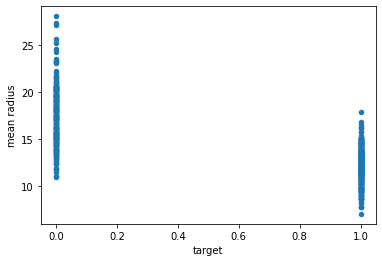

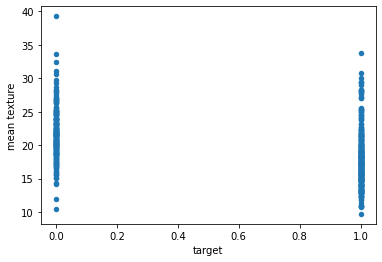

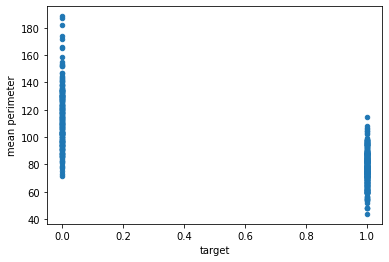

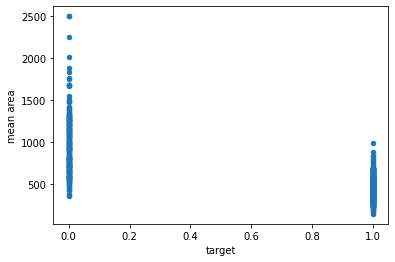

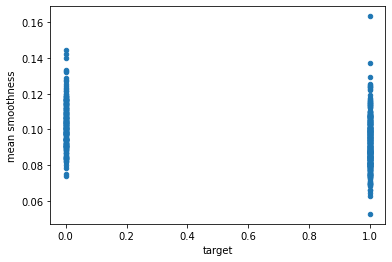

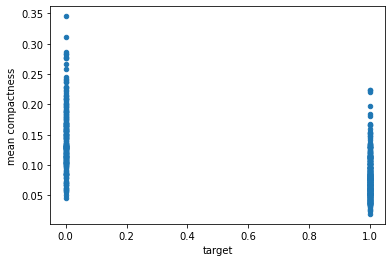

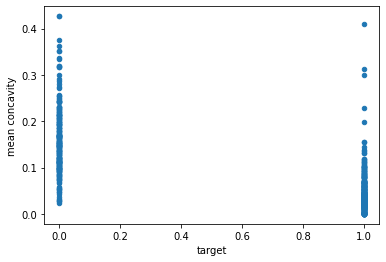

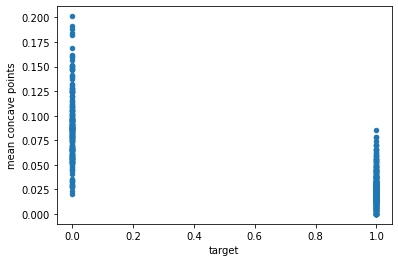

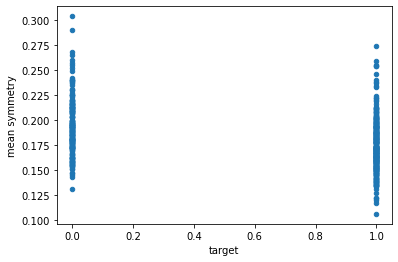

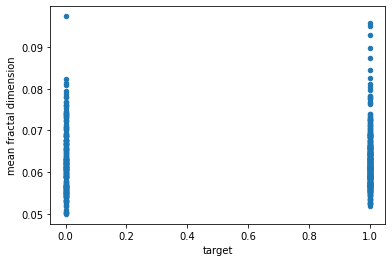

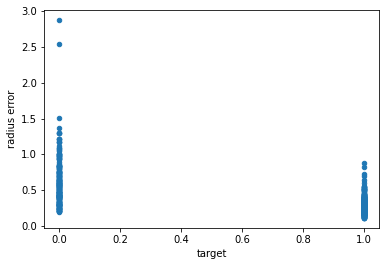

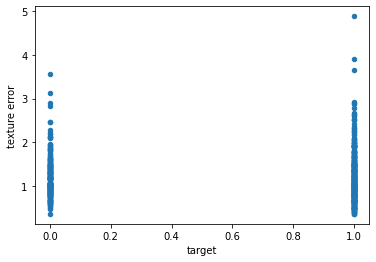

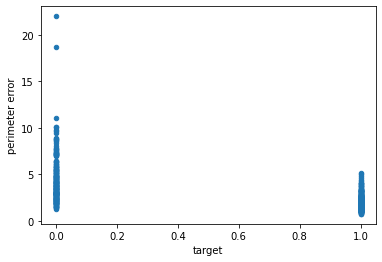

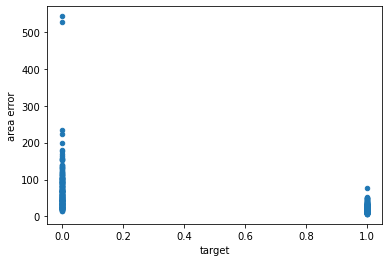

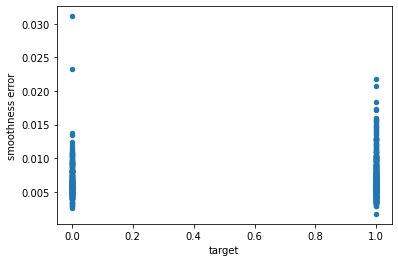

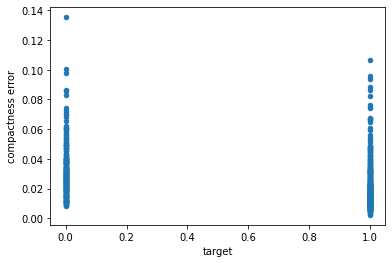

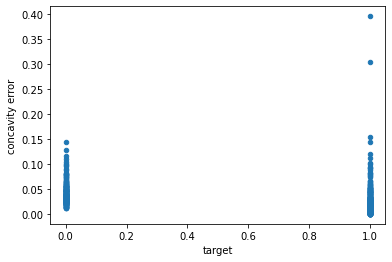

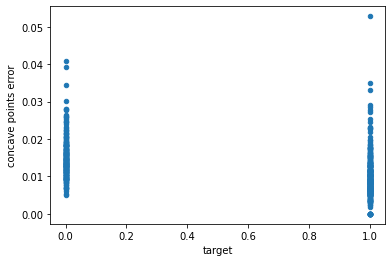

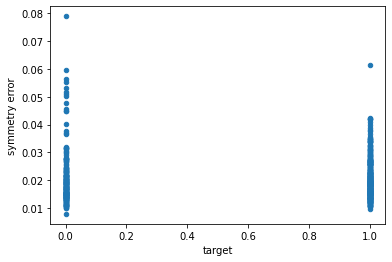

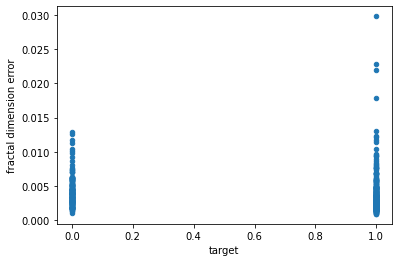

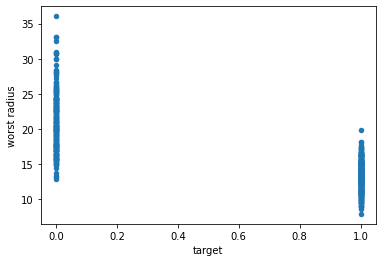

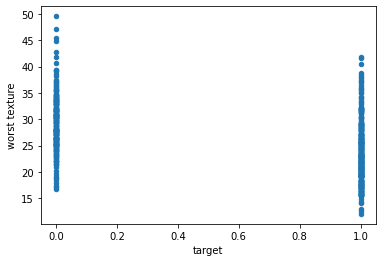

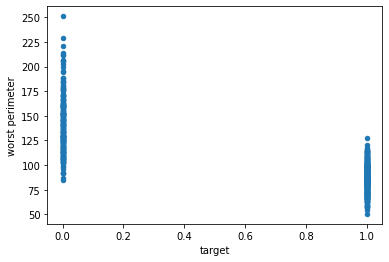

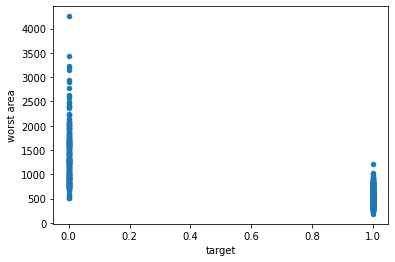

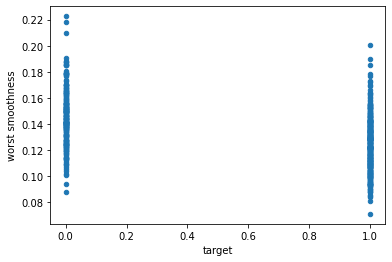

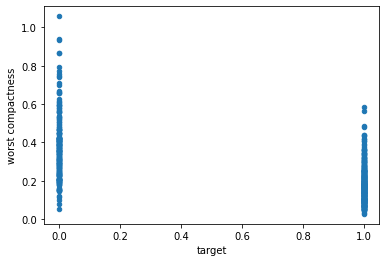

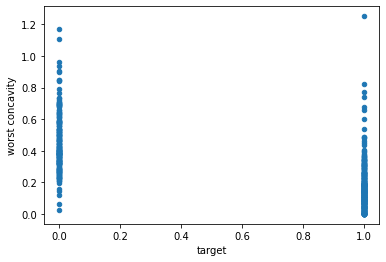

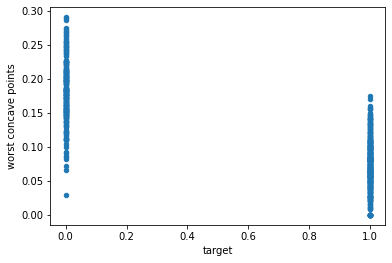

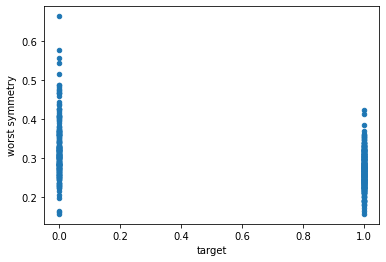

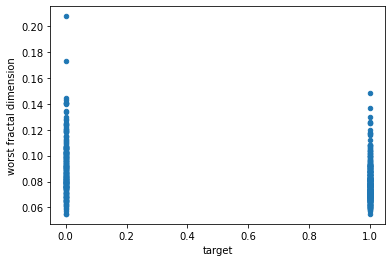

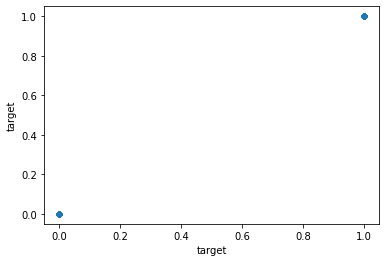

In [5]:
# 散布図を使い、外れ値を探す
# 【考察】：散布図からは、外れ値と明言できる値が見つからない
colname = df.columns
for name in colname:
  df.plot(kind ='scatter',x = 'target', y = name )


In [6]:
# describe関数で、最大値・最小値・平均値・中央値・四分位などを表示する
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### ◆欠損値の有無を確認する

In [7]:
# データフレームの全体の欠損値の有無を確認する
print('データフレーム全体の欠損値 = ',df.isnull().sum().sum())

データフレーム全体の欠損値 =  0


In [8]:
print('【考察】：欠損値がないため、欠損値処理不要と確認する')

【考察】：欠損値がないため、欠損値処理不要と確認する


### ◆特徴量を変数xに代入してデータフレームを作成する
#### 特徴量に、目的変数(正解データ)の「target」以外の列を抽出する

In [9]:
# 特徴量の抽出
x = df.iloc[:,0:-1]
# 特徴量の先頭の3行を表示
x.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### ◆目的変数(正解データ)の「target」列を変数tに代入してデータフレームを作成する


In [10]:
# 目的変数(正解データ)の抽出
t = df.loc[:,'target']
# 特徴量の先頭の3行を表示
t.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

### ◆訓練データとテストデータの分割
　　訓練データを7割、テストデータを3割に分割する


In [11]:
# train_test_split関数のインポート
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, t,test_size = 0.3, random_state = 0)

### ◆分割した訓練データ、テストデータの行数と列数を表示し
### 正しく分割されたか確認する


In [12]:
# 訓練データの行数と列数を表示
lx = x_train.shape
print('x_train:行数 = ',lx[0],'、','列数 = ',lx[1])
# テストデータの行数と列数を表示
ly = x_test.shape
print('x_test:行数 = ',ly[0],'、','列数 = ',ly[1])

print('訓練データとテストデータが、7:3の比率で分割されている')

x_train:行数 =  398 、 列数 =  30
x_test:行数 =  171 、 列数 =  30
訓練データとテストデータが、7:3の比率で分割されている


### ◆モデルの準備と学習の実施

In [13]:
# SVMのライブラリの読み込み
from sklearn.svm import LinearSVC

# モデルの初期化、学習を行う
model = LinearSVC()

# 学習データを使った学習（ fit : trainデータを使って、学習）
model.fit(x_train, y_train)

trainscore = model.score(x_train, y_train)
# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model.score(x_test, y_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)

学習データの学習結果： 0.9170854271356784
テストデータの学習結果： 0.9532163742690059


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### ◆正解率を上げるための試行錯誤

In [14]:
# corr関数で、相関係数マトリックスを表示する
df.corr()['target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

### 【考察】:相関係数の絶対値の値が低い列を説明変数から外す(特徴量の絞り込み)
　　　相関が低い列 = 「texture error」「mean fractal dimension」「symmetry error」「fractal dimension error」


In [15]:
# 特徴量の抽出
x2 = x.drop(['texture error','mean fractal dimension','symmetry error','fractal dimension error'], axis = 1)
# 特徴量の先頭の3行を表示
x2.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [16]:
# 訓練データとテストデータに分割
# 訓練データとテストデータの分割比率を8:2に変更すする
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, t,test_size = 0.2, random_state = 1)

In [17]:
# モデルの初期化、学習を行う
model2 = LinearSVC()
# 学習データを使った学習（ fit : trainデータを使って、学習）
model2.fit(x2_train, y2_train)

# テストデータを利用して正解率を計算し表示する
print('訓練データの正解率 = ', model2.score(x2_train,y2_train))
print('テストデータの正解率 = ', model2.score(x2_test,y2_test))


訓練データの正解率 =  0.9252747252747253
テストデータの正解率 =  0.9385964912280702


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### 【考察】:十分に良いスコアを出すことができた。

In [18]:
model2.predict(x2_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

### ◆モデルを保存する

In [19]:
import pickle

# モデルを保存
# 実装
with open('kouka_bunrui(SVM)_breast_cancer.pkl', 'wb') as f:
  pickle.dump(model2, f)